In [2]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [4]:
from fsd_path_planning.demo.json_demo import load_data_json
from pathlib import Path


# data = list(zip(*load_data_json(Path('fsd_path_planning/demo/october_gatow_3.json'), remove_color_info=True)))
data = list(zip(*load_data_json(Path('fsd_path_planning/demo/fss_19_4_laps.json'), remove_color_info=True)))
# data = list(zip(*load_data_json(remove_color_info=True)))

In [5]:
from fsd_path_planning import MissionTypes, PathPlanner
from fsd_path_planning.sorting_cones.trace_sorter.core_trace_sorter import TraceSorter



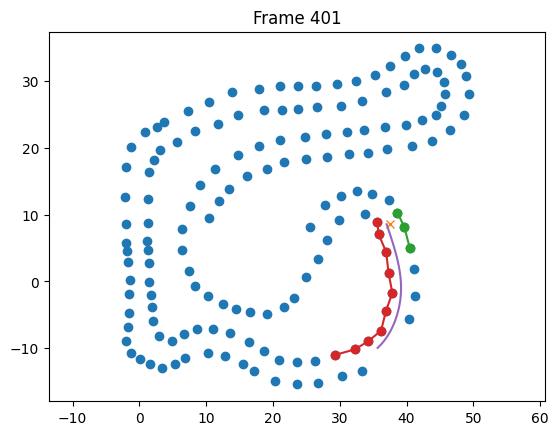

In [6]:

frame = 1243
frame = 181

# TOOD: october_gatow_3.json frame 490
# ΤΟDO: october_gatow.json frame 330

start_frame = 401
end_frame = 0

if end_frame <= start_frame:
    end_frame = start_frame + 1

for i in range(start_frame, end_frame):

    planner = PathPlanner(MissionTypes.trackdrive)

    car_position, car_direction, cones = data[i]

    out = planner.calculate_path_in_global_frame(
        cones,
        car_position,
        car_direction,
        return_intermediate_results=True,
    )

    # %timeit planner.calculate_path_in_global_frame(cones,car_position,car_direction,return_intermediate_results=True)
    # assert isinstance(out, tuple)

    (
        final_path,
        sorted_left,
        sorted_right,
        left_cones_with_virtual,
        right_cones_with_virtual,
        left_to_right_match,
        right_to_left_match,
    ) = out

    all_cones = np.row_stack(cones)

    plt.plot(all_cones[:, 0], all_cones[:, 1], 'o')
    plt.plot(car_position[0], car_position[1], 'x')
    plt.plot(*sorted_left.T, 'o-')
    plt.plot(*sorted_right.T, 'o-')
    # plt.plot(*left_cones_with_virtual.T, 'o-')
    # plt.plot(*right_cones_with_virtual.T, 'o-')
    plt.plot(*final_path[:,1:3].T, '-')
    plt.axis('equal')
    plt.title(f'Frame {i}')
    plt.show()



{'max_n_neighbors': 5, 'max_dist': 6.5, 'max_dist_to_first': 6.0, 'max_length': 11, 'threshold_directional_angle': 0.6981317007977318, 'threshold_absolute_angle': 1.1344640137963142, 'use_unknown_cones': True}


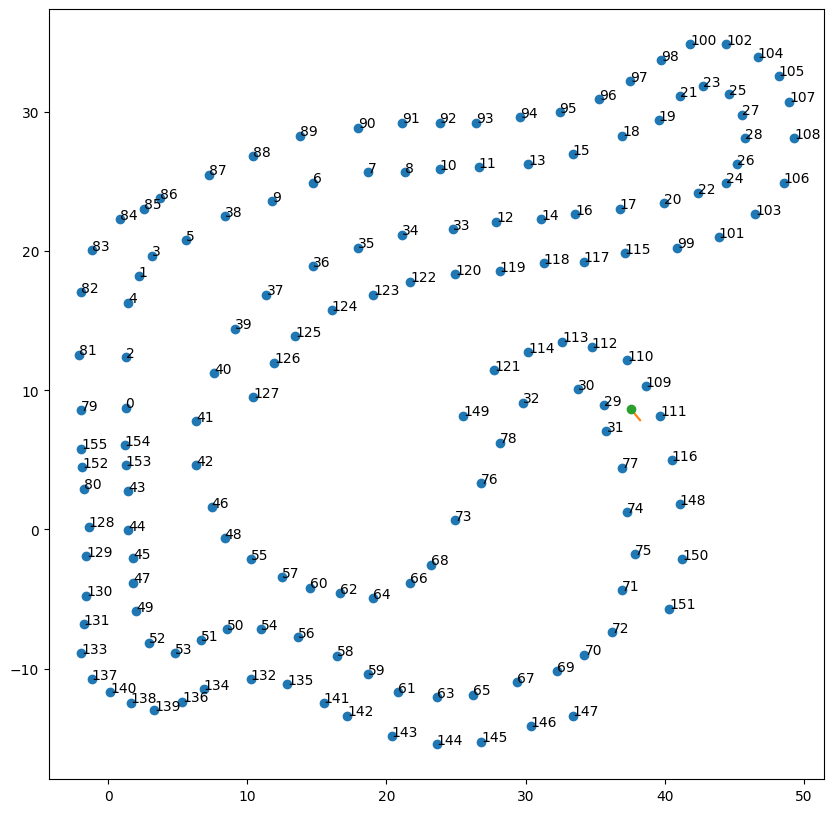

3 10


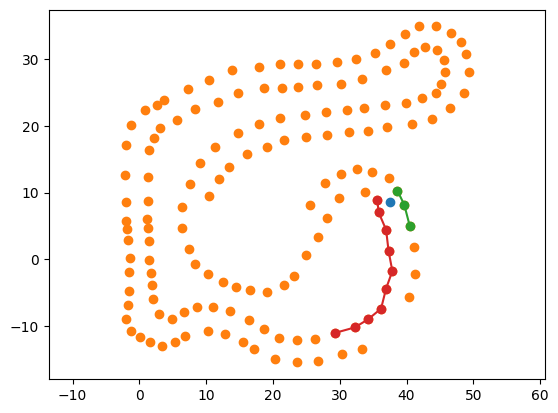

In [7]:
from fsd_path_planning.config import get_cone_sorting_config
from fsd_path_planning import ConeTypes

c = get_cone_sorting_config(MissionTypes.trackdrive)
print(c)
c1 = c.copy()
del c1['use_unknown_cones']

ts = TraceSorter(**c1)

cones_flat = ts.flatten_cones_by_type_array(cones)

mask_keep = np.ones(len(cones_flat), dtype=bool)
# mask_keep[17] = False

cones_flat = cones_flat[mask_keep]
plt.figure(figsize=(10,10))
plt.plot(cones_flat[:, 0], cones_flat[:, 1], "o")

car_end = car_position + car_direction
car_s = np.array([car_position, car_end])
plt.plot(*car_s.T, "-")
plt.plot(*car_position, "o")
for i, cone in enumerate(cones_flat):
    plt.text(cone[0], cone[1], str(i))

plt.axis("equal")
plt.show()

# start_idx = ts.select_first_k_starting_cones(car_position, car_direction, cones_flat, ConeTypes.RIGHT)
plt.plot(car_position[0], car_position[1], "o")

l,r = ts.sort_left_right(cones, car_position, car_direction)
# %timeit ts.sort_left_right(cones, car_position, car_direction)
plt.plot(cones_flat[:, 0], cones_flat[:, 1], "o")
# plt.plot(cones_flat[start_idx, 0], cones_flat[start_idx, 1], "o-")
# plt.plot(car_position[0], car_position[1], "o")
plt.plot(*l.T, "o-")
plt.plot(*r.T, "o-")
plt.axis("equal")

print(len(l), len(r))

In [8]:
from fsd_path_planning.sorting_cones.trace_sorter.combine_traces import calc_final_configs_when_both_available
from fsd_path_planning.sorting_cones.trace_sorter.cost_function import cost_configurations

# %lprun -f cost_configurations -f ts.sort_left_right ts.sort_left_right(cones, car_position, car_direction) 

In [10]:
from fsd_path_planning.sorting_cones.trace_sorter.nearby_cone_search import number_cones_on_each_side_for_each_config
from numpy import array, int32

configs = array([[148,  69,  71,  62,  50,  49,  52,  53,  59,  66, 172],
       [148,  69,  71,  62,  50,  49,  52,  53,  59,  66, 113],
       [148,  69,  71,  62,  57,  56, 110,  61,  66,  -1,  -1],
       [148,  69,  71,  62,  57,  56, 110,  59,  -1,  -1,  -1],
       [148,  69,  71,  62,  57,  56, 110,  61, 112, 113, 172],
       [148,  69,  71,  62,  57,  56, 110,  61, 112, 109, 114],
       [148,  69,  71,  62,  57,  56, 110,  61, 112, 109, 104]],
      dtype=int32)


# a,b = number_cones_on_each_side_for_each_config(cones_flat, configs, ConeTypes.LEFT,  6.0, np.pi / 2,)
# a_alt, b_alt = number_cones_on_each_side_for_each_config_alt(cones_flat, configs, ConeTypes.LEFT,  6.0, np.pi / 2,)

# # %timeit number_cones_on_each_side_for_each_config(cones_flat, configs, ConeTypes.LEFT,  6.0, np.pi / 2,)
# # %timeit number_cones_on_each_side_for_each_config_alt(cones_flat, configs, ConeTypes.LEFT,  6.0, np.pi / 2,)

# np.testing.assert_array_equal(a, a_alt)
# np.testing.assert_array_equal(b, b_alt)

In [ ]:
# number_cones_on_each_side_for_each_config, number_cones_on_each_side_for_each_config_alt

(-3.296504478706724, 3.285609099981643, -3.291258042540579, 3.2936209478009713)

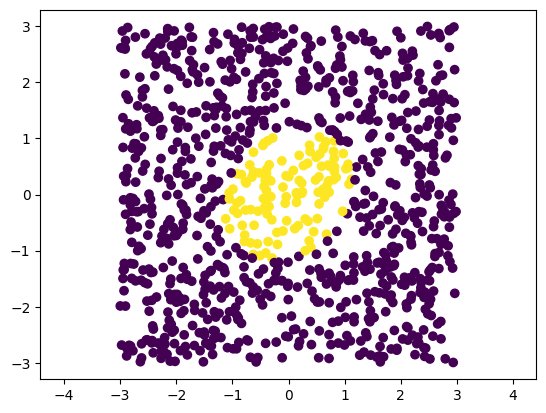

In [29]:
r = (np.random.rand(1000, 2) * 2 - 1) * 3

from fsd_path_planning.utils.math_utils import points_inside_ellipse

# f = njit(points_inside_ellipse)

center = np.array([0,0])
direction = np.array([1,1])
major_radius = 1.3
minor_radius = 1

# %timeit m = f(r, center, direction, major_radius, minor_radius)
# %timeit m = points_inside_ellipse(r, center, direction, major_radius, minor_radius)

m1 = f(r, center, direction, major_radius, minor_radius)
m2 = points_inside_ellipse(r, center, direction, major_radius, minor_radius)

np.testing.assert_array_equal(m1, m2)



plt.scatter(*r.T, c=m1)
plt.axis("equal")

In [ ]:
from fsd_path_planning.sorting_cones.trace_sorter.nearby_cone_search import create_angle_cache, create_seach_directions_cache, my_cdist_sq_euclidean

class NearbyConeSearcher:

    def __init__(self) -> None:
        self.caches_cache: dict[tuple[bytes, ConeTypes], tuple[dict, dict, np.ndarray, np.ndarray]] = {}

    def get_caches(self, cones: np.ndarray, cone_type: ConeTypes) -> tuple[dict, dict]:
        array_buffer = cones.tobytes()
        cache_key = (array_buffer, cone_type)
        if cache_key not in self.caches_cache:
            cones_xy = cones[:, :2]
            distance_matrix_square = my_cdist_sq_euclidean(cones_xy, cones_xy)
            np.fill_diagonal(distance_matrix_square, 1e7)
            cones_to_cones = cones_xy - cones_xy[:, None]

            self.caches_cache[cache_key] = create_seach_directions_cache(), create_angle_cache(), distance_matrix_square, cones_to_cones

        return self.caches_cache[cache_key]


    def number_of_cones_on_each_side_for_each_config(self, cones: np.ndarray, configs: np.ndarray, cone_type: ConeTypes, max_distance: float, max_angle: float) -> tuple[np.ndarray, np.ndarray]:
        cached_values = self.get_caches(cones, cone_type)
        return number_cones_on_each_side_for_each_config(cones, configs, cone_type, max_distance, max_angle, *cached_values[:])

In [ ]:
from fsd_path_planning.utils.utils import Timer

In [ ]:


def f1():
    ncs = NearbyConeSearcher()
    ncs.number_of_cones_on_each_side_for_each_config(cones_flat, configs, ConeTypes.LEFT,  6.0, np.pi / 2,)


ncs = NearbyConeSearcher()
ncs.number_of_cones_on_each_side_for_each_config(cones_flat, configs, ConeTypes.LEFT,  6.0, np.pi / 2,)
def f2():
    ncs.number_of_cones_on_each_side_for_each_config(cones_flat, configs, ConeTypes.LEFT,  6.0, np.pi / 2,) 


configs_changed = configs.copy()
configs_first = configs_changed[:,2]
configs_second = configs_changed[:,3]
configs_changed[:,2] = configs_second
configs_changed[:,3] = configs_first

def f3():
    ncs.number_of_cones_on_each_side_for_each_config(cones_flat, configs_changed, ConeTypes.LEFT,  6.0, np.pi / 2,)

%timeit f1()
%timeit f2()
%timeit f3()

2.04 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
277 µs ± 46.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
280 µs ± 46.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
from fsd_path_planning.utils.utils import Timer

ncs = NearbyConeSearcher()
# ncs.number_of_cones_on_each_side_for_each_config(cones_flat, configs, ConeTypes.LEFT,  6.0, np.pi / 2,)
# ncs.number_of_cones_on_each_side_for_each_config(cones_flat, configs, ConeTypes.LEFT,  6.0, np.pi / 2,)

with Timer("first run"):
    ncs.number_of_cones_on_each_side_for_each_config(cones_flat, configs, ConeTypes.LEFT,  6.0, np.pi / 2,)

with Timer("second run"):
    ncs.number_of_cones_on_each_side_for_each_config(cones_flat, configs, ConeTypes.LEFT,  6.0, np.pi / 2,)

with Timer("third run"):
    ncs.number_of_cones_on_each_side_for_each_config(cones_flat, configs, ConeTypes.LEFT,  6.0, np.pi / 2,)


with Timer("fourth run"):
    ncs.number_of_cones_on_each_side_for_each_config(cones_flat, configs_changed, ConeTypes.LEFT,  6.0, np.pi / 2,)



a = ncs.number_of_cones_on_each_side_for_each_config(cones_flat, configs, ConeTypes.LEFT,  6.0, np.pi / 2,)
b = number_cones_on_each_side_for_each_config(cones_flat, configs, ConeTypes.LEFT,  6.0, np.pi / 2,)



np.testing.assert_array_equal(a, b)

Block 'first run' took 3195.299 μs
Block 'second run' took 3627.399 μs
Block 'third run' took 1836.700 μs
Block 'fourth run' took 603.099 μs


In [ ]:
# %lprun -f number_cones_on_each_side_for_each_config number_cones_on_each_side_for_each_config(cones_flat, configs, ConeTypes.LEFT,  6.0, np.pi / 2,)

In [ ]:
# %lprun -f number_cones_on_each_side_for_each_config_alt number_cones_on_each_side_for_each_config_alt(cones_flat, configs, ConeTypes.LEFT,  6.0, np.pi / 2,)

In [ ]:
from pathlib import Path

n_configs_list = []
n_cones_list = []
time_list = []

for line in Path('ncoesfec.txt').read_text().splitlines():
    n_configs, n_cones, time = eval(line)
    n_configs_list.append(n_configs)
    n_cones_list.append(n_cones)
    time_list.append(time)

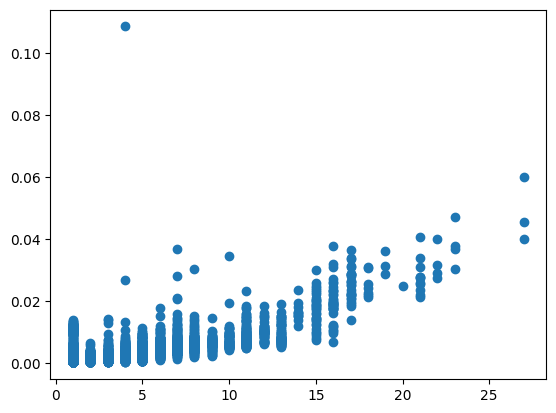

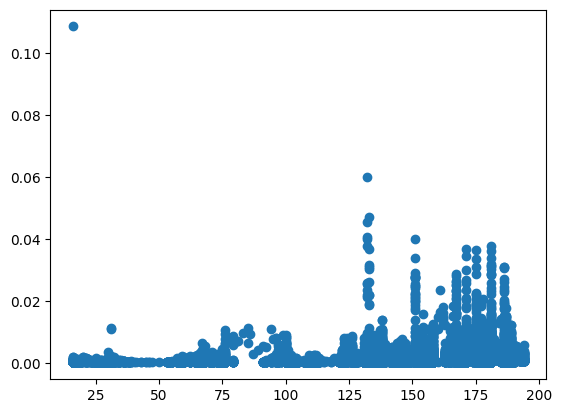

In [ ]:
plt.plot(n_configs_list, time_list, 'o')
plt.show()
plt.plot(n_cones_list, time_list, 'o')
# plt.ylim(0, 0.04)

In [ ]:
from numpy import array, int32

cones, configs, cone_type, dist, angle = (array([[ 1.24879456,  8.75      ],
       [ 2.18629456, 18.1875    ],
       [ 1.24879456, 12.375     ],
       [ 3.12379456, 19.6875    ],
       [ 1.43629456, 16.3125    ],
       [ 5.56129456, 20.8125    ],
       [14.74879456, 24.9375    ],
       [18.68629456, 25.6875    ],
       [21.31129456, 25.6875    ],
       [11.74879456, 23.625     ],
       [23.81129456, 25.875     ],
       [26.62379456, 26.0625    ],
       [27.89708838, 22.13631838],
       [30.18629456, 26.25      ],
       [31.12379456, 22.3125    ],
       [33.37379456, 27.        ],
       [33.56129456, 22.6875    ],
       [36.74879456, 23.0625    ],
       [36.93629456, 28.3125    ],
       [39.56129456, 29.4375    ],
       [39.93629456, 23.4375    ],
       [41.06129456, 31.125     ],
       [42.37379456, 24.1875    ],
       [42.74879456, 31.875     ],
       [44.43629456, 24.9375    ],
       [44.62379456, 31.3125    ],
       [45.18629456, 26.25      ],
       [45.56129456, 29.8125    ],
       [45.74879456, 28.125     ],
       [-1.93870544,  8.5625    ],
       [-1.75120544,  2.9375    ],
       [-2.12620544, 12.5625    ],
       [-1.93870544, 17.0625    ],
       [-1.18870544, 20.0625    ],
       [ 0.87379456, 22.3125    ],
       [ 2.56129456, 23.0625    ],
       [ 3.68629456, 23.8125    ],
       [ 7.24879456, 25.5       ],
       [10.43629456, 26.8125    ],
       [13.81129456, 28.3125    ],
       [17.93629456, 28.875     ],
       [21.12379456, 29.25      ],
       [23.81129456, 29.25      ],
       [26.43629456, 29.25      ],
       [29.62379456, 29.625     ],
       [32.43629456, 30.        ],
       [35.24879456, 30.9375    ],
       [37.49879456, 32.25      ],
       [39.74879456, 33.75      ],
       [40.87379456, 20.25      ],
       [41.81129456, 34.875     ],
       [43.87379456, 21.        ],
       [44.43629456, 34.875     ],
       [46.49879456, 22.6875    ],
       [46.68629456, 33.9375    ],
       [48.18629456, 32.625     ],
       [48.56129456, 24.9375    ],
       [48.93629456, 30.75      ],
       [49.31129456, 28.125     ],
       [-1.87620544,  4.5       ],
       [ 1.24879456,  4.625     ],
       [ 1.18629456,  6.0625    ],
       [-1.93870544,  5.8125    ]]), array([[43, 44, 46, 48, 52, 55, 58, 56, 53, 51, 49],
       [43, 44, 46, 48, 52, 55, 58, 56, 53, 49, -1],
       [43, 44, 46, 48, 52, 55, 58, 56, 51, 49, -1],
       [43, 44, 46, 48, 52, 55, 58, 53, 51, 49, -1],
       [43, 44, 46, 48, 52, 55, 58, 53, 49, -1, -1],
       [43, 44, 46, 48, 52, 55, 57, 58, 56, 53, 51],
       [43, 44, 46, 48, 52, 55, 57, 58, 56, 53, 49],
       [43, 44, 46, 48, 52, 55, 57, 58, 56, 51, 49],
       [43, 44, 46, 48, 52, 55, 57, 58, 53, 51, 49],
       [43, 44, 46, 48, 52, 55, 57, 58, 53, 49, -1],
       [43, 44, 46, 48, 52, 55, 57, 56, 53, 51, 49],
       [43, 44, 46, 48, 52, 55, 57, 56, 53, 49, -1],
       [43, 44, 46, 48, 52, 55, 57, 56, 51, 49, -1],
       [43, 44, 46, 48, 52, 54, 57, 58, 56, 53, 51],
       [43, 44, 46, 48, 52, 54, 57, 58, 56, 53, 49],
       [43, 44, 46, 48, 52, 54, 57, 58, 56, 51, 49],
       [43, 44, 46, 48, 52, 54, 57, 58, 53, 51, 49],
       [43, 44, 46, 48, 52, 54, 57, 58, 53, 49, -1],
       [43, 44, 46, 48, 52, 54, 57, 56, 53, 51, 49],
       [43, 44, 46, 48, 52, 54, 57, 56, 53, 49, -1],
       [43, 44, 46, 48, 52, 54, 57, 56, 51, 49, -1],
       [43, 44, 46, 48, 52, 54, 55, 58, 56, 53, 51],
       [43, 44, 46, 48, 52, 54, 55, 58, 56, 53, 49],
       [43, 44, 46, 48, 52, 54, 55, 58, 56, 51, 49],
       [43, 44, 46, 48, 52, 54, 55, 58, 53, 51, 49],
       [43, 44, 46, 48, 52, 54, 55, 58, 53, 49, -1],
       [43, 44, 46, 48, 52, 54, 55, 57, 58, 56, 53],
       [43, 44, 46, 48, 52, 54, 55, 57, 58, 56, 51],
       [43, 44, 46, 48, 52, 54, 55, 57, 58, 53, 51],
       [43, 44, 46, 48, 52, 54, 55, 57, 58, 53, 49],
       [43, 44, 46, 48, 52, 54, 55, 57, 56, 53, 51],
       [43, 44, 46, 48, 52, 54, 55, 57, 56, 53, 49],
       [43, 44, 46, 48, 52, 54, 55, 57, 56, 51, 49],
       [43, 44, 46, 48, 50, 54, 57, 58, 56, 53, 51],
       [43, 44, 46, 48, 50, 54, 57, 58, 56, 53, 49],
       [43, 44, 46, 48, 50, 54, 57, 58, 56, 51, 49],
       [43, 44, 46, 48, 50, 54, 57, 58, 53, 51, 49],
       [43, 44, 46, 48, 50, 54, 57, 58, 53, 49, -1],
       [43, 44, 46, 48, 50, 54, 57, 56, 53, 51, 49],
       [43, 44, 46, 48, 50, 54, 57, 56, 53, 49, -1],
       [43, 44, 46, 48, 50, 54, 57, 56, 51, 49, -1],
       [43, 44, 46, 48, 50, 54, 55, 58, 56, 53, 51],
       [43, 44, 46, 48, 50, 54, 55, 58, 56, 53, 49],
       [43, 44, 46, 48, 50, 54, 55, 58, 56, 51, 49],
       [43, 44, 46, 48, 50, 54, 55, 58, 53, 51, 49],
       [43, 44, 46, 48, 50, 54, 55, 58, 53, 49, -1],
       [43, 44, 46, 48, 50, 54, 55, 57, 58, 56, 53],
       [43, 44, 46, 48, 50, 54, 55, 57, 58, 56, 51],
       [43, 44, 46, 48, 50, 54, 55, 57, 58, 53, 51],
       [43, 44, 46, 48, 50, 54, 55, 57, 58, 53, 49],
       [43, 44, 46, 48, 50, 54, 55, 57, 56, 53, 51],
       [43, 44, 46, 48, 50, 54, 55, 57, 56, 53, 49],
       [43, 44, 46, 48, 50, 54, 55, 57, 56, 51, 49],
       [43, 44, 46, 48, 50, 52, 55, 58, 56, 53, 51],
       [43, 44, 46, 48, 50, 52, 55, 58, 56, 53, 49],
       [43, 44, 46, 48, 50, 52, 55, 58, 56, 51, 49],
       [43, 44, 46, 48, 50, 52, 55, 58, 53, 51, 49],
       [43, 44, 46, 48, 50, 52, 55, 58, 53, 49, -1],
       [43, 44, 46, 48, 50, 52, 55, 57, 58, 56, 53],
       [43, 44, 46, 48, 50, 52, 55, 57, 58, 56, 51],
       [43, 44, 46, 48, 50, 52, 55, 57, 58, 53, 51],
       [43, 44, 46, 48, 50, 52, 55, 57, 58, 53, 49],
       [43, 44, 46, 48, 50, 52, 55, 57, 56, 53, 51],
       [43, 44, 46, 48, 50, 52, 55, 57, 56, 53, 49],
       [43, 44, 46, 48, 50, 52, 55, 57, 56, 51, 49],
       [43, 44, 46, 48, 50, 52, 54, 57, 58, 56, 53],
       [43, 44, 46, 48, 50, 52, 54, 57, 58, 56, 51],
       [43, 44, 46, 48, 50, 52, 54, 57, 58, 53, 51],
       [43, 44, 46, 48, 50, 52, 54, 57, 58, 53, 49],
       [43, 44, 46, 48, 50, 52, 54, 57, 56, 53, 51],
       [43, 44, 46, 48, 50, 52, 54, 57, 56, 53, 49],
       [43, 44, 46, 48, 50, 52, 54, 57, 56, 51, 49],
       [43, 44, 46, 48, 50, 52, 54, 55, 58, 56, 53],
       [43, 44, 46, 48, 50, 52, 54, 55, 58, 56, 51],
       [43, 44, 46, 48, 50, 52, 54, 55, 58, 53, 51],
       [43, 44, 46, 48, 50, 52, 54, 55, 58, 53, 49],
       [43, 44, 46, 48, 50, 52, 54, 55, 57, 58, 56],
       [43, 44, 46, 48, 50, 52, 54, 55, 57, 58, 53],
       [43, 44, 46, 48, 50, 52, 54, 55, 57, 56, 53],
       [43, 44, 46, 48, 50, 52, 54, 55, 57, 56, 51],
       [43, 44, 46, 47, 50, 54, 57, 58, 56, 53, 51],
       [43, 44, 46, 47, 50, 54, 57, 58, 56, 53, 49],
       [43, 44, 46, 47, 50, 54, 57, 58, 56, 51, 49],
       [43, 44, 46, 47, 50, 54, 57, 58, 53, 51, 49],
       [43, 44, 46, 47, 50, 54, 57, 58, 53, 49, -1],
       [43, 44, 46, 47, 50, 54, 57, 56, 53, 51, 49],
       [43, 44, 46, 47, 50, 54, 57, 56, 53, 49, -1],
       [43, 44, 46, 47, 50, 54, 57, 56, 51, 49, -1],
       [43, 44, 46, 47, 50, 54, 55, 58, 56, 53, 51],
       [43, 44, 46, 47, 50, 54, 55, 58, 56, 53, 49],
       [43, 44, 46, 47, 50, 54, 55, 58, 56, 51, 49],
       [43, 44, 46, 47, 50, 54, 55, 58, 53, 51, 49],
       [43, 44, 46, 47, 50, 54, 55, 58, 53, 49, -1],
       [43, 44, 46, 47, 50, 54, 55, 57, 58, 56, 53],
       [43, 44, 46, 47, 50, 54, 55, 57, 58, 56, 51],
       [43, 44, 46, 47, 50, 54, 55, 57, 58, 53, 51],
       [43, 44, 46, 47, 50, 54, 55, 57, 58, 53, 49],
       [43, 44, 46, 47, 50, 54, 55, 57, 56, 53, 51],
       [43, 44, 46, 47, 50, 54, 55, 57, 56, 53, 49],
       [43, 44, 46, 47, 50, 54, 55, 57, 56, 51, 49],
       [43, 44, 46, 47, 50, 52, 55, 58, 56, 53, 51],
       [43, 44, 46, 47, 50, 52, 55, 58, 56, 53, 49],
       [43, 44, 46, 47, 50, 52, 55, 58, 56, 51, 49],
       [43, 44, 46, 47, 50, 52, 55, 58, 53, 51, 49],
       [43, 44, 46, 47, 50, 52, 55, 58, 53, 49, -1],
       [43, 44, 46, 47, 50, 52, 55, 57, 58, 56, 53],
       [43, 44, 46, 47, 50, 52, 55, 57, 58, 56, 51],
       [43, 44, 46, 47, 50, 52, 55, 57, 58, 53, 51],
       [43, 44, 46, 47, 50, 52, 55, 57, 58, 53, 49],
       [43, 44, 46, 47, 50, 52, 55, 57, 56, 53, 51],
       [43, 44, 46, 47, 50, 52, 55, 57, 56, 53, 49],
       [43, 44, 46, 47, 50, 52, 55, 57, 56, 51, 49],
       [43, 44, 46, 47, 50, 52, 54, 57, 58, 56, 53],
       [43, 44, 46, 47, 50, 52, 54, 57, 58, 56, 51],
       [43, 44, 46, 47, 50, 52, 54, 57, 58, 53, 51],
       [43, 44, 46, 47, 50, 52, 54, 57, 58, 53, 49],
       [43, 44, 46, 47, 50, 52, 54, 57, 56, 53, 51],
       [43, 44, 46, 47, 50, 52, 54, 57, 56, 53, 49],
       [43, 44, 46, 47, 50, 52, 54, 57, 56, 51, 49],
       [43, 44, 46, 47, 50, 52, 54, 55, 58, 56, 53],
       [43, 44, 46, 47, 50, 52, 54, 55, 58, 56, 51],
       [43, 44, 46, 47, 50, 52, 54, 55, 58, 53, 51],
       [43, 44, 46, 47, 50, 52, 54, 55, 58, 53, 49],
       [43, 44, 46, 47, 50, 52, 54, 55, 57, 58, 56],
       [43, 44, 46, 47, 50, 52, 54, 55, 57, 58, 53],
       [43, 44, 46, 47, 50, 52, 54, 55, 57, 56, 53],
       [43, 44, 46, 47, 50, 52, 54, 55, 57, 56, 51],
       [43, 44, 46, 47, 48, 52, 55, 58, 56, 53, 51],
       [43, 44, 46, 47, 48, 52, 55, 58, 56, 53, 49],
       [43, 44, 46, 47, 48, 52, 55, 58, 56, 51, 49],
       [43, 44, 46, 47, 48, 52, 55, 58, 53, 51, 49],
       [43, 44, 46, 47, 48, 52, 55, 58, 53, 49, -1],
       [43, 44, 46, 47, 48, 52, 55, 57, 58, 56, 53],
       [43, 44, 46, 47, 48, 52, 55, 57, 58, 56, 51],
       [43, 44, 46, 47, 48, 52, 55, 57, 58, 53, 51],
       [43, 44, 46, 47, 48, 52, 55, 57, 58, 53, 49],
       [43, 44, 46, 47, 48, 52, 55, 57, 56, 53, 51],
       [43, 44, 46, 47, 48, 52, 55, 57, 56, 53, 49],
       [43, 44, 46, 47, 48, 52, 55, 57, 56, 51, 49],
       [43, 44, 46, 47, 48, 52, 54, 57, 58, 56, 53],
       [43, 44, 46, 47, 48, 52, 54, 57, 58, 56, 51],
       [43, 44, 46, 47, 48, 52, 54, 57, 58, 53, 51],
       [43, 44, 46, 47, 48, 52, 54, 57, 58, 53, 49],
       [43, 44, 46, 47, 48, 52, 54, 57, 56, 53, 51],
       [43, 44, 46, 47, 48, 52, 54, 57, 56, 53, 49],
       [43, 44, 46, 47, 48, 52, 54, 57, 56, 51, 49],
       [43, 44, 46, 47, 48, 52, 54, 55, 58, 56, 53],
       [43, 44, 46, 47, 48, 52, 54, 55, 58, 56, 51],
       [43, 44, 46, 47, 48, 52, 54, 55, 58, 53, 51],
       [43, 44, 46, 47, 48, 52, 54, 55, 58, 53, 49],
       [43, 44, 46, 47, 48, 52, 54, 55, 57, 58, 56],
       [43, 44, 46, 47, 48, 52, 54, 55, 57, 58, 53],
       [43, 44, 46, 47, 48, 52, 54, 55, 57, 56, 53],
       [43, 44, 46, 47, 48, 52, 54, 55, 57, 56, 51],
       [43, 44, 46, 47, 48, 50, 54, 57, 58, 56, 53],
       [43, 44, 46, 47, 48, 50, 54, 57, 58, 56, 51],
       [43, 44, 46, 47, 48, 50, 54, 57, 58, 53, 51],
       [43, 44, 46, 47, 48, 50, 54, 57, 58, 53, 49],
       [43, 44, 46, 47, 48, 50, 54, 57, 56, 53, 51],
       [43, 44, 46, 47, 48, 50, 54, 57, 56, 53, 49],
       [43, 44, 46, 47, 48, 50, 54, 57, 56, 51, 49],
       [43, 44, 46, 47, 48, 50, 54, 55, 58, 56, 53],
       [43, 44, 46, 47, 48, 50, 54, 55, 58, 56, 51],
       [43, 44, 46, 47, 48, 50, 54, 55, 58, 53, 51],
       [43, 44, 46, 47, 48, 50, 54, 55, 58, 53, 49],
       [43, 44, 46, 47, 48, 50, 54, 55, 57, 58, 56],
       [43, 44, 46, 47, 48, 50, 54, 55, 57, 58, 53],
       [43, 44, 46, 47, 48, 50, 54, 55, 57, 56, 53],
       [43, 44, 46, 47, 48, 50, 54, 55, 57, 56, 51],
       [43, 44, 46, 47, 48, 50, 52, 55, 58, 56, 53],
       [43, 44, 46, 47, 48, 50, 52, 55, 58, 56, 51],
       [43, 44, 46, 47, 48, 50, 52, 55, 58, 53, 51],
       [43, 44, 46, 47, 48, 50, 52, 55, 58, 53, 49],
       [43, 44, 46, 47, 48, 50, 52, 55, 57, 58, 56],
       [43, 44, 46, 47, 48, 50, 52, 55, 57, 58, 53],
       [43, 44, 46, 47, 48, 50, 52, 55, 57, 56, 53],
       [43, 44, 46, 47, 48, 50, 52, 55, 57, 56, 51],
       [43, 44, 46, 47, 48, 50, 52, 54, 57, 58, 56],
       [43, 44, 46, 47, 48, 50, 52, 54, 57, 58, 53],
       [43, 44, 46, 47, 48, 50, 52, 54, 57, 56, 53],
       [43, 44, 46, 47, 48, 50, 52, 54, 57, 56, 51],
       [43, 44, 46, 47, 48, 50, 52, 54, 55, 58, 56],
       [43, 44, 46, 47, 48, 50, 52, 54, 55, 58, 53],
       [43, 44, 46, 47, 48, 50, 52, 54, 55, 57, 58],
       [43, 44, 46, 47, 48, 50, 52, 54, 55, 57, 56],
       [43, 44, 45, 47, 50, 54, 57, 58, 56, 53, 51],
       [43, 44, 45, 47, 50, 54, 57, 58, 56, 53, 49],
       [43, 44, 45, 47, 50, 54, 57, 58, 56, 51, 49],
       [43, 44, 45, 47, 50, 54, 57, 58, 53, 51, 49],
       [43, 44, 45, 47, 50, 54, 57, 58, 53, 49, -1],
       [43, 44, 45, 47, 50, 54, 57, 56, 53, 51, 49],
       [43, 44, 45, 47, 50, 54, 57, 56, 53, 49, -1],
       [43, 44, 45, 47, 50, 54, 57, 56, 51, 49, -1],
       [43, 44, 45, 47, 50, 54, 55, 58, 56, 53, 51],
       [43, 44, 45, 47, 50, 54, 55, 58, 56, 53, 49],
       [43, 44, 45, 47, 50, 54, 55, 58, 56, 51, 49],
       [43, 44, 45, 47, 50, 54, 55, 58, 53, 51, 49],
       [43, 44, 45, 47, 50, 54, 55, 58, 53, 49, -1],
       [43, 44, 45, 47, 50, 54, 55, 57, 58, 56, 53],
       [43, 44, 45, 47, 50, 54, 55, 57, 58, 56, 51],
       [43, 44, 45, 47, 50, 54, 55, 57, 58, 53, 51],
       [43, 44, 45, 47, 50, 54, 55, 57, 58, 53, 49],
       [43, 44, 45, 47, 50, 54, 55, 57, 56, 53, 51],
       [43, 44, 45, 47, 50, 54, 55, 57, 56, 53, 49],
       [43, 44, 45, 47, 50, 54, 55, 57, 56, 51, 49],
       [43, 44, 45, 47, 50, 52, 55, 58, 56, 53, 51],
       [43, 44, 45, 47, 50, 52, 55, 58, 56, 53, 49],
       [43, 44, 45, 47, 50, 52, 55, 58, 56, 51, 49],
       [43, 44, 45, 47, 50, 52, 55, 58, 53, 51, 49],
       [43, 44, 45, 47, 50, 52, 55, 58, 53, 49, -1],
       [43, 44, 45, 47, 50, 52, 55, 57, 58, 56, 53],
       [43, 44, 45, 47, 50, 52, 55, 57, 58, 56, 51],
       [43, 44, 45, 47, 50, 52, 55, 57, 58, 53, 51],
       [43, 44, 45, 47, 50, 52, 55, 57, 58, 53, 49],
       [43, 44, 45, 47, 50, 52, 55, 57, 56, 53, 51],
       [43, 44, 45, 47, 50, 52, 55, 57, 56, 53, 49],
       [43, 44, 45, 47, 50, 52, 55, 57, 56, 51, 49],
       [43, 44, 45, 47, 50, 52, 54, 57, 58, 56, 53],
       [43, 44, 45, 47, 50, 52, 54, 57, 58, 56, 51],
       [43, 44, 45, 47, 50, 52, 54, 57, 58, 53, 51],
       [43, 44, 45, 47, 50, 52, 54, 57, 58, 53, 49],
       [43, 44, 45, 47, 50, 52, 54, 57, 56, 53, 51],
       [43, 44, 45, 47, 50, 52, 54, 57, 56, 53, 49],
       [43, 44, 45, 47, 50, 52, 54, 57, 56, 51, 49],
       [43, 44, 45, 47, 50, 52, 54, 55, 58, 56, 53],
       [43, 44, 45, 47, 50, 52, 54, 55, 58, 56, 51],
       [43, 44, 45, 47, 50, 52, 54, 55, 58, 53, 51],
       [43, 44, 45, 47, 50, 52, 54, 55, 58, 53, 49],
       [43, 44, 45, 47, 50, 52, 54, 55, 57, 58, 56],
       [43, 44, 45, 47, 50, 52, 54, 55, 57, 58, 53],
       [43, 44, 45, 47, 50, 52, 54, 55, 57, 56, 53],
       [43, 44, 45, 47, 50, 52, 54, 55, 57, 56, 51],
       [43, 44, 45, 47, 48, 52, 55, 58, 56, 53, 51],
       [43, 44, 45, 47, 48, 52, 55, 58, 56, 53, 49],
       [43, 44, 45, 47, 48, 52, 55, 58, 56, 51, 49],
       [43, 44, 45, 47, 48, 52, 55, 58, 53, 51, 49],
       [43, 44, 45, 47, 48, 52, 55, 58, 53, 49, -1],
       [43, 44, 45, 47, 48, 52, 55, 57, 58, 56, 53],
       [43, 44, 45, 47, 48, 52, 55, 57, 58, 56, 51],
       [43, 44, 45, 47, 48, 52, 55, 57, 58, 53, 51],
       [43, 44, 45, 47, 48, 52, 55, 57, 58, 53, 49],
       [43, 44, 45, 47, 48, 52, 55, 57, 56, 53, 51],
       [43, 44, 45, 47, 48, 52, 55, 57, 56, 53, 49],
       [43, 44, 45, 47, 48, 52, 55, 57, 56, 51, 49],
       [43, 44, 45, 47, 48, 52, 54, 57, 58, 56, 53],
       [43, 44, 45, 47, 48, 52, 54, 57, 58, 56, 51],
       [43, 44, 45, 47, 48, 52, 54, 57, 58, 53, 51],
       [43, 44, 45, 47, 48, 52, 54, 57, 58, 53, 49],
       [43, 44, 45, 47, 48, 52, 54, 57, 56, 53, 51],
       [43, 44, 45, 47, 48, 52, 54, 57, 56, 53, 49],
       [43, 44, 45, 47, 48, 52, 54, 57, 56, 51, 49],
       [43, 44, 45, 47, 48, 52, 54, 55, 58, 56, 53],
       [43, 44, 45, 47, 48, 52, 54, 55, 58, 56, 51],
       [43, 44, 45, 47, 48, 52, 54, 55, 58, 53, 51],
       [43, 44, 45, 47, 48, 52, 54, 55, 58, 53, 49],
       [43, 44, 45, 47, 48, 52, 54, 55, 57, 58, 56],
       [43, 44, 45, 47, 48, 52, 54, 55, 57, 58, 53],
       [43, 44, 45, 47, 48, 52, 54, 55, 57, 56, 53],
       [43, 44, 45, 47, 48, 52, 54, 55, 57, 56, 51],
       [43, 44, 45, 47, 48, 50, 54, 57, 58, 56, 53],
       [43, 44, 45, 47, 48, 50, 54, 57, 58, 56, 51],
       [43, 44, 45, 47, 48, 50, 54, 57, 58, 53, 51],
       [43, 44, 45, 47, 48, 50, 54, 57, 58, 53, 49],
       [43, 44, 45, 47, 48, 50, 54, 57, 56, 53, 51],
       [43, 44, 45, 47, 48, 50, 54, 57, 56, 53, 49],
       [43, 44, 45, 47, 48, 50, 54, 57, 56, 51, 49],
       [43, 44, 45, 47, 48, 50, 54, 55, 58, 56, 53],
       [43, 44, 45, 47, 48, 50, 54, 55, 58, 56, 51],
       [43, 44, 45, 47, 48, 50, 54, 55, 58, 53, 51],
       [43, 44, 45, 47, 48, 50, 54, 55, 58, 53, 49],
       [43, 44, 45, 47, 48, 50, 54, 55, 57, 58, 56],
       [43, 44, 45, 47, 48, 50, 54, 55, 57, 58, 53],
       [43, 44, 45, 47, 48, 50, 54, 55, 57, 56, 53],
       [43, 44, 45, 47, 48, 50, 54, 55, 57, 56, 51],
       [43, 44, 45, 47, 48, 50, 52, 55, 58, 56, 53],
       [43, 44, 45, 47, 48, 50, 52, 55, 58, 56, 51],
       [43, 44, 45, 47, 48, 50, 52, 55, 58, 53, 51],
       [43, 44, 45, 47, 48, 50, 52, 55, 58, 53, 49],
       [43, 44, 45, 47, 48, 50, 52, 55, 57, 58, 56],
       [43, 44, 45, 47, 48, 50, 52, 55, 57, 58, 53],
       [43, 44, 45, 47, 48, 50, 52, 55, 57, 56, 53],
       [43, 44, 45, 47, 48, 50, 52, 55, 57, 56, 51],
       [43, 44, 45, 47, 48, 50, 52, 54, 57, 58, 56],
       [43, 44, 45, 47, 48, 50, 52, 54, 57, 58, 53],
       [43, 44, 45, 47, 48, 50, 52, 54, 57, 56, 53],
       [43, 44, 45, 47, 48, 50, 52, 54, 57, 56, 51],
       [43, 44, 45, 47, 48, 50, 52, 54, 55, 58, 56],
       [43, 44, 45, 47, 48, 50, 52, 54, 55, 58, 53],
       [43, 44, 45, 47, 48, 50, 52, 54, 55, 57, 58],
       [43, 44, 45, 47, 48, 50, 52, 54, 55, 57, 56],
       [43, 44, 45, 46, 48, 52, 55, 58, 56, 53, 51],
       [43, 44, 45, 46, 48, 52, 55, 58, 56, 53, 49],
       [43, 44, 45, 46, 48, 52, 55, 58, 56, 51, 49],
       [43, 44, 45, 46, 48, 52, 55, 58, 53, 51, 49],
       [43, 44, 45, 46, 48, 52, 55, 58, 53, 49, -1],
       [43, 44, 45, 46, 48, 52, 55, 57, 58, 56, 53],
       [43, 44, 45, 46, 48, 52, 55, 57, 58, 56, 51],
       [43, 44, 45, 46, 48, 52, 55, 57, 58, 53, 51],
       [43, 44, 45, 46, 48, 52, 55, 57, 58, 53, 49],
       [43, 44, 45, 46, 48, 52, 55, 57, 56, 53, 51],
       [43, 44, 45, 46, 48, 52, 55, 57, 56, 53, 49],
       [43, 44, 45, 46, 48, 52, 55, 57, 56, 51, 49],
       [43, 44, 45, 46, 48, 52, 54, 57, 58, 56, 53],
       [43, 44, 45, 46, 48, 52, 54, 57, 58, 56, 51],
       [43, 44, 45, 46, 48, 52, 54, 57, 58, 53, 51],
       [43, 44, 45, 46, 48, 52, 54, 57, 58, 53, 49],
       [43, 44, 45, 46, 48, 52, 54, 57, 56, 53, 51],
       [43, 44, 45, 46, 48, 52, 54, 57, 56, 53, 49],
       [43, 44, 45, 46, 48, 52, 54, 57, 56, 51, 49],
       [43, 44, 45, 46, 48, 52, 54, 55, 58, 56, 53],
       [43, 44, 45, 46, 48, 52, 54, 55, 58, 56, 51],
       [43, 44, 45, 46, 48, 52, 54, 55, 58, 53, 51],
       [43, 44, 45, 46, 48, 52, 54, 55, 58, 53, 49],
       [43, 44, 45, 46, 48, 52, 54, 55, 57, 58, 56],
       [43, 44, 45, 46, 48, 52, 54, 55, 57, 58, 53],
       [43, 44, 45, 46, 48, 52, 54, 55, 57, 56, 53],
       [43, 44, 45, 46, 48, 52, 54, 55, 57, 56, 51],
       [43, 44, 45, 46, 48, 50, 54, 57, 58, 56, 53],
       [43, 44, 45, 46, 48, 50, 54, 57, 58, 56, 51],
       [43, 44, 45, 46, 48, 50, 54, 57, 58, 53, 51],
       [43, 44, 45, 46, 48, 50, 54, 57, 58, 53, 49],
       [43, 44, 45, 46, 48, 50, 54, 57, 56, 53, 51],
       [43, 44, 45, 46, 48, 50, 54, 57, 56, 53, 49],
       [43, 44, 45, 46, 48, 50, 54, 57, 56, 51, 49],
       [43, 44, 45, 46, 48, 50, 54, 55, 58, 56, 53],
       [43, 44, 45, 46, 48, 50, 54, 55, 58, 56, 51],
       [43, 44, 45, 46, 48, 50, 54, 55, 58, 53, 51],
       [43, 44, 45, 46, 48, 50, 54, 55, 58, 53, 49],
       [43, 44, 45, 46, 48, 50, 54, 55, 57, 58, 56],
       [43, 44, 45, 46, 48, 50, 54, 55, 57, 58, 53],
       [43, 44, 45, 46, 48, 50, 54, 55, 57, 56, 53],
       [43, 44, 45, 46, 48, 50, 54, 55, 57, 56, 51],
       [43, 44, 45, 46, 48, 50, 52, 55, 58, 56, 53],
       [43, 44, 45, 46, 48, 50, 52, 55, 58, 56, 51],
       [43, 44, 45, 46, 48, 50, 52, 55, 58, 53, 51],
       [43, 44, 45, 46, 48, 50, 52, 55, 58, 53, 49],
       [43, 44, 45, 46, 48, 50, 52, 55, 57, 58, 56],
       [43, 44, 45, 46, 48, 50, 52, 55, 57, 58, 53],
       [43, 44, 45, 46, 48, 50, 52, 55, 57, 56, 53],
       [43, 44, 45, 46, 48, 50, 52, 55, 57, 56, 51],
       [43, 44, 45, 46, 48, 50, 52, 54, 57, 58, 56],
       [43, 44, 45, 46, 48, 50, 52, 54, 57, 58, 53],
       [43, 44, 45, 46, 48, 50, 52, 54, 57, 56, 53],
       [43, 44, 45, 46, 48, 50, 52, 54, 57, 56, 51],
       [43, 44, 45, 46, 48, 50, 52, 54, 55, 58, 56],
       [43, 44, 45, 46, 48, 50, 52, 54, 55, 58, 53],
       [43, 44, 45, 46, 48, 50, 52, 54, 55, 57, 58],
       [43, 44, 45, 46, 48, 50, 52, 54, 55, 57, 56],
       [43, 44, 45, 46, 47, 50, 54, 57, 58, 56, 53],
       [43, 44, 45, 46, 47, 50, 54, 57, 58, 56, 51],
       [43, 44, 45, 46, 47, 50, 54, 57, 58, 53, 51],
       [43, 44, 45, 46, 47, 50, 54, 57, 58, 53, 49],
       [43, 44, 45, 46, 47, 50, 54, 57, 56, 53, 51],
       [43, 44, 45, 46, 47, 50, 54, 57, 56, 53, 49],
       [43, 44, 45, 46, 47, 50, 54, 57, 56, 51, 49],
       [43, 44, 45, 46, 47, 50, 54, 55, 58, 56, 53],
       [43, 44, 45, 46, 47, 50, 54, 55, 58, 56, 51],
       [43, 44, 45, 46, 47, 50, 54, 55, 58, 53, 51],
       [43, 44, 45, 46, 47, 50, 54, 55, 58, 53, 49],
       [43, 44, 45, 46, 47, 50, 54, 55, 57, 58, 56],
       [43, 44, 45, 46, 47, 50, 54, 55, 57, 58, 53],
       [43, 44, 45, 46, 47, 50, 54, 55, 57, 56, 53],
       [43, 44, 45, 46, 47, 50, 54, 55, 57, 56, 51],
       [43, 44, 45, 46, 47, 50, 52, 55, 58, 56, 53],
       [43, 44, 45, 46, 47, 50, 52, 55, 58, 56, 51],
       [43, 44, 45, 46, 47, 50, 52, 55, 58, 53, 51],
       [43, 44, 45, 46, 47, 50, 52, 55, 58, 53, 49],
       [43, 44, 45, 46, 47, 50, 52, 55, 57, 58, 56],
       [43, 44, 45, 46, 47, 50, 52, 55, 57, 58, 53],
       [43, 44, 45, 46, 47, 50, 52, 55, 57, 56, 53],
       [43, 44, 45, 46, 47, 50, 52, 55, 57, 56, 51],
       [43, 44, 45, 46, 47, 50, 52, 54, 57, 58, 56],
       [43, 44, 45, 46, 47, 50, 52, 54, 57, 58, 53],
       [43, 44, 45, 46, 47, 50, 52, 54, 57, 56, 53],
       [43, 44, 45, 46, 47, 50, 52, 54, 57, 56, 51],
       [43, 44, 45, 46, 47, 50, 52, 54, 55, 58, 56],
       [43, 44, 45, 46, 47, 50, 52, 54, 55, 58, 53],
       [43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 58],
       [43, 44, 45, 46, 47, 50, 52, 54, 55, 57, 56],
       [43, 44, 45, 46, 47, 48, 52, 55, 58, 56, 53],
       [43, 44, 45, 46, 47, 48, 52, 55, 58, 56, 51],
       [43, 44, 45, 46, 47, 48, 52, 55, 58, 53, 51],
       [43, 44, 45, 46, 47, 48, 52, 55, 58, 53, 49],
       [43, 44, 45, 46, 47, 48, 52, 55, 57, 58, 56],
       [43, 44, 45, 46, 47, 48, 52, 55, 57, 58, 53],
       [43, 44, 45, 46, 47, 48, 52, 55, 57, 56, 53],
       [43, 44, 45, 46, 47, 48, 52, 55, 57, 56, 51],
       [43, 44, 45, 46, 47, 48, 52, 54, 57, 58, 56],
       [43, 44, 45, 46, 47, 48, 52, 54, 57, 58, 53],
       [43, 44, 45, 46, 47, 48, 52, 54, 57, 56, 53],
       [43, 44, 45, 46, 47, 48, 52, 54, 57, 56, 51],
       [43, 44, 45, 46, 47, 48, 52, 54, 55, 58, 56],
       [43, 44, 45, 46, 47, 48, 52, 54, 55, 58, 53],
       [43, 44, 45, 46, 47, 48, 52, 54, 55, 57, 58],
       [43, 44, 45, 46, 47, 48, 52, 54, 55, 57, 56],
       [43, 44, 45, 46, 47, 48, 50, 54, 57, 58, 56],
       [43, 44, 45, 46, 47, 48, 50, 54, 57, 58, 53],
       [43, 44, 45, 46, 47, 48, 50, 54, 57, 56, 53],
       [43, 44, 45, 46, 47, 48, 50, 54, 57, 56, 51],
       [43, 44, 45, 46, 47, 48, 50, 54, 55, 58, 56],
       [43, 44, 45, 46, 47, 48, 50, 54, 55, 58, 53],
       [43, 44, 45, 46, 47, 48, 50, 54, 55, 57, 58],
       [43, 44, 45, 46, 47, 48, 50, 54, 55, 57, 56],
       [43, 44, 45, 46, 47, 48, 50, 52, 55, 58, 56],
       [43, 44, 45, 46, 47, 48, 50, 52, 55, 58, 53],
       [43, 44, 45, 46, 47, 48, 50, 52, 55, 57, 58],
       [43, 44, 45, 46, 47, 48, 50, 52, 55, 57, 56],
       [43, 44, 45, 46, 47, 48, 50, 52, 54, 57, 58],
       [43, 44, 45, 46, 47, 48, 50, 52, 54, 57, 56],
       [43, 44, 45, 46, 47, 48, 50, 52, 54, 55, 58],
       [43, 44, 45, 46, 47, 48, 50, 52, 54, 55, 57]], dtype=int32), ConeTypes.BLUE, 6.0, 1.5707963267948966)


# for i,c in enumerate(configs):
#     c = c[c != -1]
#     plt.plot(*cones.T, 'o')
#     plt.plot(*cones[c].T, 'o-')
#     plt.title(f'Config {i}')
#     plt.show()

In [ ]:
from numba import njit
import numba as nb
from fsd_path_planning.cone_matching.functional_cone_matching import calculate_search_direction_for_one
from sys import maxsize

@njit
def create_cache_dict():
    return {(maxsize,maxsize,maxsize): np.array([-1.0, -1.0])}



@njit
def calculate_match_search_direction_for_one_if_not_in_cache(cones_xy, key, cone_type, d):
    if key not in d:
        d[key] = calculate_search_direction_for_one(cones_xy, key[0::2], cone_type)

    

    return d[key]

@njit
def pre_caluclate_search_directions(cones, configs, cone_type):
    cones_xy = cones[:, :2]
    d = create_cache_dict()
    for c in configs:
        c = c[c != -1]
        assert len(c) >= 2

        key_first = (c[0], maxsize, c[1])
        key_last = (c[-2], maxsize, c[-1])
        
        calculate_match_search_direction_for_one_if_not_in_cache(cones_xy, key_first, cone_type, d)
        calculate_match_search_direction_for_one_if_not_in_cache(cones_xy, key_last, cone_type, d)

        for j in range(1, len(c)-1):
            key = (c[j-1], c[j], c[j+1])
            calculate_match_search_direction_for_one_if_not_in_cache(cones_xy, key, cone_type, d)

            
    return d




In [ ]:
from fsd_path_planning.sorting_cones.trace_sorter.nearby_cone_search import *
from fsd_path_planning.utils.math_utils import vec_angle_between, angle_from_2d_vector, angle_difference, norm_of_last_axis
from fsd_path_planning.utils.utils import Timer

@njit
def create_angle_cache():
    d = {
        ((maxsize, maxsize, maxsize), maxsize, maxsize, False): False,
    }
   
    return d

@njit
def calculate_angle_between_search_direction_of_cone_and_other_cone_too_large(all_cone_directions, directions_key, cone_idx, other_cone_idx, search_directions_cache, search_angle, negate_direction):
    from_cone_to_other_cone = all_cone_directions[cone_idx, other_cone_idx]

    search_direction = search_directions_cache[directions_key]
    if negate_direction:
        search_direction = -search_direction

    return vec_angle_between(from_cone_to_other_cone, search_direction) < search_angle / 2


@njit
def calculate_angle_between_search_direction_of_cone_and_other_cone_if_not_in_cache(all_cone_directions, directions_key, cone_idx, other_cone_idx, search_directions_cache, angle_cache, search_angle, negate_direction):
    global hits, misses
    key = (directions_key, cone_idx, other_cone_idx, negate_direction)
    if key not in angle_cache:    
        angle_cache[key] = calculate_angle_between_search_direction_of_cone_and_other_cone_too_large(all_cone_directions, directions_key, cone_idx, other_cone_idx, search_directions_cache, search_angle, negate_direction)
    
    return angle_cache[key]

    


@njit
def calculate_visible_cones_for_one_cone(
    cone_idx,
    distance_matrix_mask,
    search_direction_key,
    cone_to_cone_vecs,
    search_angle,
    negate_direction,
    search_direction_cache,
    angles_between_search_direction_and_other_cone_cache,
    idxs_to_check
):
    
    angle_mask = np.zeros(len(idxs_to_check), dtype=np.bool_)
    for i in range(len(idxs_to_check)):
        idx = idxs_to_check[i]

        if distance_matrix_mask[cone_idx, idx] == 0:
            continue
       
        value = calculate_angle_between_search_direction_of_cone_and_other_cone_if_not_in_cache(
            cone_to_cone_vecs,
            search_direction_key,
            cone_idx,
            idx,
            search_direction_cache,
            angles_between_search_direction_and_other_cone_cache,
            search_angle,
            negate_direction,
        )
        angle_mask[i] = value

    

    mask_distance = distance_matrix_mask[cone_idx]

    return angle_mask & mask_distance[idxs_to_check]
    

@njit
def new_number_cones_on_each_side_for_each_config(
    cones: FloatArray,
    configs: IntArray,
    cone_type: ConeTypes,
    search_distance: float,
    search_angle: float,
) -> tuple[IntArray, IntArray]:
    """
    For each configuration, find the number of cones that are on the expected side of
    the track, and the number of cones that are on the wrong side of the track.

    Args:
        cones: array of cone positions and types
        configs: array of sorted cone configurations
        cone_type: the type of cone we are considering
        search_distance: the distance to search for cones
        search_angle: the angle to search for cones

    Returns:
        A tuple of two arrays, the first is the number of cones on the correct side of
        the track, the second is the number of cones on the wrong side of the track.
    """
    cones_xy = cones[:, :2]

    idxs_in_all_configs = np.unique(configs)
    idxs_in_all_configs = idxs_in_all_configs[idxs_in_all_configs != -1]

    from_cone_to_cone = cones_xy - np.expand_dims(cones_xy, 1)
    distance_matrix = norm_of_last_axis(from_cone_to_cone)
    np.fill_diagonal(distance_matrix, np.inf)
    distance_matrix_mask = distance_matrix < search_distance

    search_directions_cache = pre_caluclate_search_directions(cones, configs, cone_type)

    close_idxs = find_nearby_cones_for_idxs(idxs_in_all_configs, distance_matrix ** 2, search_distance)

    n_bad_cones_for_all = np.zeros(len(configs), dtype=np.int_)
    n_good_cones_for_all = np.zeros(len(configs), dtype=np.int_)

    angle_cache = create_angle_cache()
    for i, c in enumerate(configs):
        c = c[c != -1]
        
        
        extra_idxs = sorted_set_diff(idxs_in_all_configs, c)
        other_idxs = np.concatenate((close_idxs, extra_idxs))
    
        
        for j in range(len(c)):
            
            if j == 0:
                key = (c[j], maxsize, c[j+1])
            elif j == len(c)-1:
                key = (c[j-1], maxsize, c[j])
            else:
                key = (c[j-1], c[j], c[j+1])
            
            
            
            mask_good = calculate_visible_cones_for_one_cone(c[j], distance_matrix_mask, key, from_cone_to_cone, search_angle, False, search_directions_cache, angle_cache, idxs_to_check=other_idxs)
            mask_bad = calculate_visible_cones_for_one_cone(c[j], distance_matrix_mask, key, from_cone_to_cone, search_angle, True, search_directions_cache, angle_cache, idxs_to_check=other_idxs)
            
            n_good_cones_for_all[i] += mask_good.sum()
            n_bad_cones_for_all[i] += mask_bad.sum()


    return n_good_cones_for_all, n_bad_cones_for_all


# cones = np.array([
#     [0,2,0],
#     [0,4,0],
#     [0,6,0],
#     [0,-2,0],
#     [0,-4,0],
#     [0,-6,0],
#     [0, -8, 0],
# ], dtype=float
# )
# configs = np.array(
#     [[0,1,2,-1], [0,4,5,6]]
# )
# cone_type = ConeTypes.LEFT




In [ ]:
with Timer('new'):
    new1, new2 = new_number_cones_on_each_side_for_each_config(cones, configs, cone_type, dist, angle)
with Timer('old'):
    old1, old2 = number_cones_on_each_side_for_each_config(cones, configs, cone_type, dist, angle)
print(old1)
print(new1)
# print(old1 - new1)
# print(old2 - new2)
assert np.all(np.abs(new1 - old1) < 1)
np.testing.assert_allclose(new1, old1)
np.testing.assert_allclose(new2, old2)
# assert np.all(new1 == old1)
# assert np.all(new2 == old2)
# %timeit -n5 -r5 new_number_cones_on_each_side_for_each_config(cones, configs, cone_type, dist, angle)

# %timeit -n5 -r5 number_cones_on_each_side_for_each_config(cones, configs, cone_type, dist, angle)
len(configs)

Block 'new' took 32345.700 μs
Block 'old' took 738120.995 μs
[38 34 33 34 30 38 38 37 37 33 36 32 31 38 38 37 37 33 37 33 32 38 38 37
 38 34 39 37 37 37 36 36 35 38 38 37 37 33 37 33 32 38 38 37 38 34 39 37
 37 37 36 36 35 38 38 37 38 34 39 37 37 37 36 36 35 39 37 37 37 37 37 36
 39 37 38 38 38 37 37 35 38 38 37 37 33 37 33 32 38 38 37 38 34 39 37 37
 37 36 36 35 38 38 37 38 34 39 37 37 37 36 36 35 39 37 37 37 37 37 36 39
 37 38 38 38 37 37 35 38 38 37 38 34 39 37 37 37 36 36 35 39 37 37 37 37
 37 36 39 37 38 38 38 37 37 35 39 37 37 37 37 37 36 39 37 38 38 38 37 37
 35 39 37 38 38 38 37 37 35 38 37 38 36 38 38 39 36 35 35 34 34 30 34 30
 29 35 35 34 35 31 36 34 34 34 33 33 32 35 35 34 35 31 36 34 34 34 33 33
 32 36 34 34 34 34 34 33 36 34 35 35 35 34 34 32 35 35 34 35 31 36 34 34
 34 33 33 32 36 34 34 34 34 34 33 36 34 35 35 35 34 34 32 36 34 34 34 34
 34 33 36 34 35 35 35 34 34 32 36 34 35 35 35 34 34 32 35 34 35 33 35 35
 36 33 36 36 35 36 32 37 35 35 35 34 34 33 37 35 35 35 35 35 34

411

In [ ]:
np.sum(np.diff(configs, axis=0) != 0, axis=0)

array([  0,   0,   1,   2,   5,  11,  23,  52, 111, 197, 291])

In [ ]:
hits, misses

(203570, 3612)

In [ ]:
x = np.array(
    [[0, 0], [1,1], [2,2], [1.9, 0.0]]
).astype(float)

direction = x - x[:,None]

angles = angle_from_2d_vector(direction)
print(angles)

# angles.shape
angles
search_direction = np.array([1, -1])
print(angles[1])
an = angle_difference(angles[1], angle_from_2d_vector(search_direction))
an[1] = np.inf
print(an)

np.abs(an) < np.deg2rad(30)

[[ 0.          0.78539816  0.78539816  0.        ]
 [-2.35619449  0.          0.78539816 -0.83798123]
 [-2.35619449 -2.35619449  0.         -1.62075472]
 [ 3.14159265  2.30361143  1.52083793  0.        ]]
[-2.35619449  0.          0.78539816 -0.83798123]
[-1.57079633         inf  1.57079633 -0.05258306]


array([False, False, False,  True])

In [ ]:
print(configs)

%timeit pre_caluclate_search_directions(cones, configs, cone_type)
# test_dict()

[[108 110  66  67   4   3   6  20  11  -1  -1]
 [108 110  66  67   4   3   6  20  10  14  16]
 [108 110  66  67   4   3   6  20  10  14  15]
 [108 110  66  67   4   3   6   7  13  23  16]
 [108 110  66  67   4   3   6   7  13  23  15]
 [108 110  66  67   4   3   5  20  11  -1  -1]
 [108 110  66  67   4   3   5  20  10  14  16]
 [108 110  66  67   4   3   5  20  10  14  15]
 [108 110  66  67   4   0  -1  -1  -1  -1  -1]
 [108 110  66  67   2   4   3   6  20  11  -1]
 [108 110  66  67   2   4   3   6  20  10  14]
 [108 110  66  67   2   4   3   6   7  13  23]
 [108 110  66  67   2   4   3   5  20  11  -1]
 [108 110  66  67   2   4   3   5  20  10  14]
 [108 110  66  62   1   0  -1  -1  -1  -1  -1]]
291 µs ± 96.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
dict(test_dict())

{(-1, -1, -1): array([-1., -1.]), (-2, -2, -2): array([1., 1.])}

108
2.2216151440871386


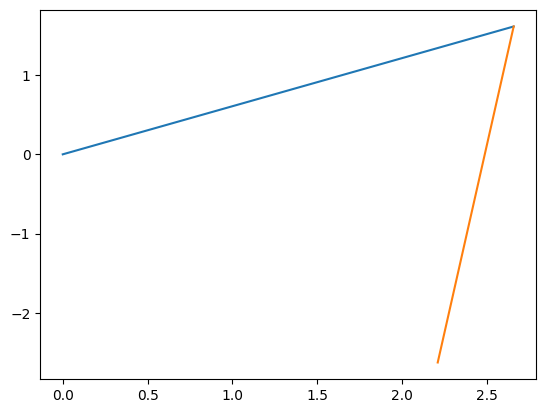

skip
117
0.19031730950183423


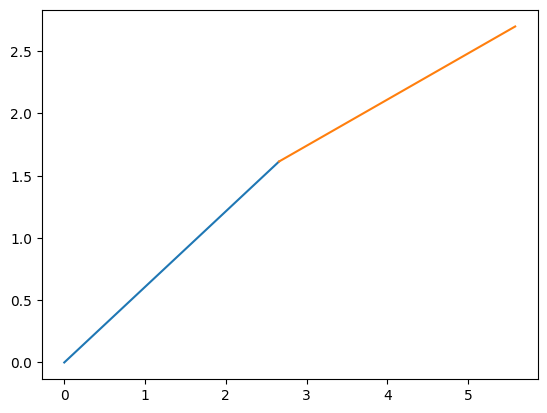

121
1.2514129034345558


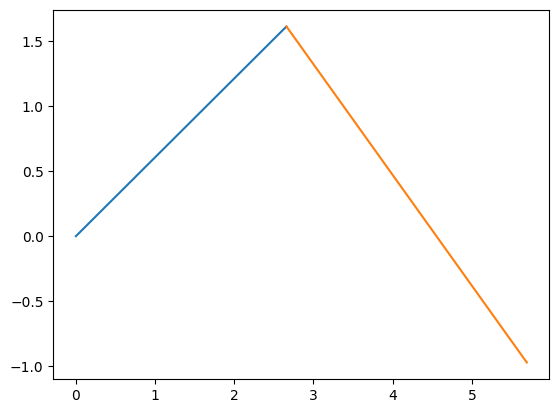

In [ ]:
from numpy import array, int32
from fsd_path_planning.sorting_cones.trace_sorter.end_configurations import neighbor_bool_mask_can_be_added_to_attempt

kwargs = {'trace': array([[ 5.24998999e+00, -1.96427393e+00],
       [ 8.84215736e+00,  2.25673532e+00],
       [ 7.56146049e+00, -1.63013148e+00],
       [ 1.31035566e+01, -2.82537913e+00],
       [ 1.56642532e+01, -3.78757524e+00],
       [ 1.08239489e+01, -2.04904604e+00],
       [ 5.60883284e+00,  2.07336545e+00],
       [ 1.71920242e+01,  5.78254986e+00],
       [ 1.99727669e+01, -4.19606781e+00],
       [ 1.38222733e+01,  2.48414934e-01],
       [ 1.28491764e+01, -1.05764141e+01],
       [ 1.91352654e+01, -3.66565377e-01],
       [ 1.92445240e+01,  1.94117987e+00],
       [ 9.54654694e+00,  7.09778643e+00],
       [ 1.49887848e+01, -1.26334457e+01],
       [ 1.65875359e+01, -2.66699851e-01],
       [ 2.14567261e+01, -7.49273777e-01],
       [ 2.17360497e+01,  7.90702915e+00],
       [ 2.41087933e+01, -7.37954259e-01],
       [ 2.36293297e+01, -4.24102831e+00],
       [ 2.63392735e+01, -1.62386417e+00],
       [ 2.85071239e+01, -2.75943351e+00],
       [ 3.12024212e+01, -4.57241392e+00],
       [ 2.59950447e+01, -5.03892136e+00],
       [ 2.85953522e+01, -6.80586910e+00],
       [ 3.30056152e+01, -6.27876425e+00],
       [ 3.40448418e+01, -8.68747997e+00],
       [ 3.48170700e+01, -1.10038109e+01],
       [ 3.51543808e+01, -1.39492702e+01],
       [ 3.15552139e+01, -1.08826218e+01],
       [ 3.19294872e+01, -1.39208908e+01],
       [ 3.39942398e+01, -1.64768944e+01],
       [ 4.60568047e+01, -6.20569658e+00],
       [ 3.75518723e+01, -3.45013022e+00],
       [ 3.19919605e+01, -1.97333298e+01],
       [ 3.66915894e+01, -1.96552391e+01],
       [ 2.89473076e+01, -2.15510635e+01],
       [ 3.67899933e+01, -3.10282784e+01],
       [ 2.59521427e+01, -2.18229198e+01],
       [ 2.21808891e+01, -2.19526157e+01],
       [ 2.24004421e+01, -3.37988510e+01],
       [ 1.65133781e+01, -2.42752857e+01],
       [ 1.45575504e+01, -2.25855865e+01],
       [ 1.94172230e+01, -2.11373882e+01],
       [ 1.74859104e+01, -2.63423882e+01],
       [ 1.77218113e+01, -2.87224293e+01],
       [ 2.52486038e+01, -1.86718464e+01],
       [ 1.69847126e+01, -1.94073009e+01],
       [ 1.34618511e+01, -2.64512672e+01],
       [ 1.22246485e+01, -2.48793201e+01],
       [ 2.29180260e+01, -1.83091583e+01],
       [ 1.72349529e+01, -3.12685795e+01],
       [ 9.99023628e+00, -2.36637478e+01],
       [ 1.40364447e+01, -3.09607449e+01],
       [ 1.16938143e+01, -2.06828461e+01],
       [ 1.27412958e+01, -1.55280828e+01],
       [ 2.09443703e+01, -1.77957821e+01],
       [ 1.91252899e+01, -1.65926991e+01],
       [ 1.58568354e+01, -3.43096581e+01],
       [ 1.68182774e+01, -1.48912039e+01],
       [ 7.12906170e+00, -1.44847651e+01],
       [ 7.70924187e+00, -1.76631489e+01],
       [ 1.49654255e+01, -1.75512772e+01],
       [ 9.20312119e+00, -1.90085430e+01],
       [ 1.05752525e+01, -1.37777615e+01],
       [ 3.86605406e+00, -1.91585121e+01],
       [ 7.32273006e+00, -2.22118816e+01],
       [ 5.45412683e+00, -2.09617195e+01],
       [ 8.21805954e+00, -1.04652719e+01],
       [ 4.59324551e+00, -7.61188889e+00],
       [ 5.32540083e+00, -1.09959221e+01],
       [ 1.05118866e+01, -1.02859154e+01],
       [ 2.94967246e+00, -1.67309284e+01],
       [ 2.80443645e+00, -1.44466438e+01],
       [ 3.43911505e+00, -1.22703066e+01],
       [ 2.70754981e+00, -2.85197306e+00],
       [-1.00482023e+00, -2.57357860e+00],
       [ 1.51108764e-02,  1.48188567e+00],
       [-6.49416351e+00, -1.71949120e+01],
       [-9.16453648e+00, -1.60541782e+01],
       [-3.92450762e+00, -1.91654015e+01],
       [-1.13307228e+01, -1.50868511e+01],
       [-5.99858570e+00, -2.30699520e+01],
       [-3.51369888e-01, -2.38673782e+01],
       [-2.60822988e+00, -2.13558979e+01],
       [-1.01632862e+01, -1.91909561e+01],
       [-7.70231056e+00, -2.05936470e+01],
       [-1.71859276e+00, -2.69259930e+01],
       [-4.23611784e+00, -2.52540436e+01],
       [ 5.56876123e-01, -2.83745651e+01],
       [ 1.91967988e+00, -3.02260742e+01],
       [ 4.80219698e+00, -2.72482243e+01],
       [ 8.06902981e+00, -3.29324112e+01],
       [ 2.37536669e+00, -2.52801018e+01],
       [ 3.75212598e+00, -3.27804184e+01],
       [ 5.24691200e+00, -3.46549530e+01],
       [ 6.67501736e+00, -3.02656994e+01],
       [ 1.04188986e+01, -3.39253426e+01],
       [ 1.40154324e+01, -2.86715508e+01],
       [ 1.01377478e+01, -3.66146088e+01],
       [ 1.28654976e+01, -3.27520027e+01],
       [ 1.27361288e+01, -3.62279663e+01],
       [ 7.39302588e+00, -3.61646805e+01],
       [-4.74734449e+00, -3.86279907e+01],
       [-1.23856516e+01, -1.81305733e+01],
       [-1.45530825e+01, -1.66566811e+01],
       [-1.65173855e+01, -1.46627150e+01],
       [-1.71762428e+01, -7.89923620e+00],
       [-1.14323492e+01, -3.76584673e+00],
       [-1.42657290e+01, -1.01028118e+01],
       [-1.36824598e+01, -1.29168978e+01],
       [-1.76708412e+01, -1.13803205e+01],
       [-1.36739407e+01, -6.46305943e+00],
       [-1.36433010e+01, -1.13773978e+00],
       [-2.46186066e+01, -4.34011936e+00],
       [-2.23307724e+01, -3.35033369e+00],
       [-1.09844847e+01,  4.76479143e-01],
       [-8.06238079e+00,  1.56078374e+00],
       [-2.45875187e+01,  9.95069790e+00],
       [-5.25394154e+00,  2.18047857e+00],
       [-9.06100082e+00,  1.22967548e+01],
       [-7.94955015e+00, -2.10991883e+00],
       [-2.48476839e+00,  2.03034091e+00],
       [-5.57333040e+00, -1.55212784e+00],
       [ 3.07594895e+00,  4.62680197e+00],
       [ 3.69403038e+01,  2.92362595e+00],
       [ 4.39627838e+01, -2.92147851e+00],
       [-1.13547325e+01, -7.75516939e+00],
       [-1.38213301e+01, -2.70202656e+01],
       [-3.06868267e+01, -1.15252895e+01],
       [-1.88980637e+01,  7.67844009e+00],
       [-1.56308346e+01,  7.14929295e+00]]), 'cone_type': ConeTypes.BLUE, 'current_attempt': array([113, 116,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1,  -1], dtype=int32), 'position_in_stack': 1, 'neighbors': array([108, 113, 117, 121]), 'threshold_directional_angle': 0.6981317007977318, 'threshold_absolute_angle': 0.9599310885968813, 'car_position': array([-13.87806292,  -4.73805429]), 'car_direction': array([0.5077767 , 0.86148872]), 'car_size': 2.1}

def angle_difference(angle1: np.ndarray, angle2: np.ndarray) -> np.ndarray:
    """
    Calculate the difference between two angles. The range of the difference is [-pi, pi].
    The order of the angles *is* important.

    Args:
        angle1: First angle.
        angle2: Second angle.

    Returns:
        The difference between the two angles.
    """
    return (angle1 - angle2 + 3 * np.pi) % (2 * np.pi) - np.pi 

c = kwargs['trace']
att = kwargs['current_attempt']
att = att[att != -1]
nei = kwargs['neighbors']
pis = kwargs['position_in_stack']

# plt.plot(c[:,0], c[:,1], 'k.')
# plt.plot(c[att,0], c[att,1], 'r.')
# plt.plot(c[nei,0], c[nei,1], 'b.')

# neighbor_bool_mask_can_be_added_to_attempt(**kwargs)
for i in range(len(nei)):
    
    if nei[i] in att:
        print('skip')
        continue
    
    print(nei[i])
    candidate_neighbor = c[nei[i]]
    second_to_last_in_attempt = c[att[pis - 1]]
    last_in_attempt = c[att[pis]]
    second_to_last_to_last = last_in_attempt - second_to_last_in_attempt
    last_to_candidate = candidate_neighbor - last_in_attempt

    m = second_to_last_to_last + last_to_candidate
    plt.plot([0, second_to_last_to_last[0]], [0, second_to_last_to_last[1]], '-')
    plt.plot([second_to_last_to_last[0], m[0]], [second_to_last_to_last[1], m[1]], '-')


    angle_1 = np.arctan2(second_to_last_to_last[1], second_to_last_to_last[0])
    angle_2 = np.arctan2(last_to_candidate[1], last_to_candidate[0])
    diff = angle_difference(angle_1, angle_2)
    print(diff)
    plt.show()
    # print(angle_1, angle_2, angle_2 - angle_1)
    

In [ ]:
import rosbag

bag = rosbag.Bag('/mnt/c/Users/papal/Downloads/2022-10-12-14-55-06.bag')

In [ ]:
odoms = []
clusters = []

for topic, msg, t in bag.read_messages(topics=['/Odometry', "/slam/accumulated_clusters"]):
    if topic == "/Odometry":
        odoms.append(msg)
    elif topic == "/slam/accumulated_clusters":
        clusters.append(msg)

In [ ]:
from fsd_path_planning.utils.math_utils import quaternion_to_euler_angles, unit_2d_vector_from_angle

def odometry_to_yaw(msg) -> None:

    position_xy = np.array(
        [
            msg.pose.pose.position.x,
            
            msg.pose.pose.position.y,
        ]
    )
    q = msg.pose.pose.orientation
    yaw = quaternion_to_euler_angles(np.array([q.x, q.y, q.z, q.w]))[2]

    direction_xy = unit_2d_vector_from_angle(yaw)

    return position_xy, direction_xy

In [ ]:
len(clusters), len(odoms)

(2036, 2042)

(-34.630396938323976,
 52.12814817428589,
 -48.876010274887086,
 17.84210810661316)

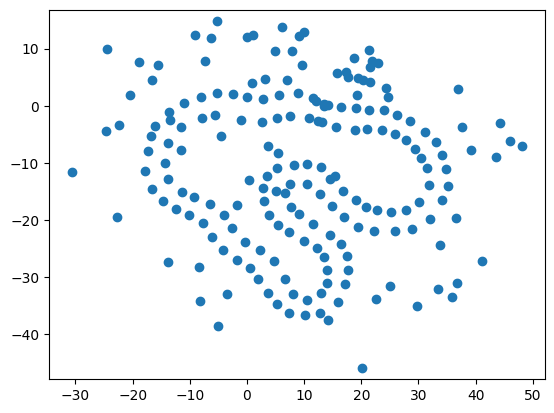

In [ ]:
from chabo_common.utils.parsing import pointcloud2_XYZI_to_array
from fsd_path_planning.utils.cone_types import ConeTypes

from sklearn.cluster import DBSCAN

def filter_clusters(clusters):
    return clusters
    model = DBSCAN(eps=2, min_samples=1).fit(clusters)

    out = []

    for l in set(model.labels_):
        mask = model.labels_ == l
        
        points_in_cluster = clusters[mask]

        if len(points_in_cluster) > 3:
            continue

        median = np.median(points_in_cluster, axis=0)

        out.append(median)

    return np.array(out)



def convert_pointscloud_to_cones_arrays(pc):
    array = pointcloud2_XYZI_to_array(pc)

    cones = [np.zeros((0,2)) for _ in ConeTypes]

    clusters = filter_clusters(array[:, :2])

    i = np.linalg.norm(clusters, axis=1).argsort()[1]
    mask_keep = np.ones(len(clusters), dtype=bool)
    mask_keep[i] = False

    clusters = clusters[mask_keep]

    cones[ConeTypes.UNKNOWN] = clusters

    return cones


x = convert_pointscloud_to_cones_arrays(clusters[-1])
plt.plot(*x[0].T, 'o')

# i = np.linalg.norm(x[0], axis=1).argsort()[1]
# print(i)
# plt.plot(*x[0][i], 'o', color='red')

plt.axis("equal")

In [ ]:
print(len(clusters), len(odoms))

2036 2042


In [ ]:

o = []

for odom, cluster in zip(odoms, clusters):
    cones = convert_pointscloud_to_cones_arrays(cluster)
    position, direction = odometry_to_yaw(odom)
    
    d = {
        "car_position": position.tolist(),
        "car_direction": direction.tolist(),
        "slam_cones": [x.tolist() for x in cones]
    }

    o.append(d)


    

In [ ]:
# idx_dist_change_start = 0

# for 

In [ ]:
import json
from pathlib import Path

Path('/home/papalotis/repos/fsd-path-planning/fsd_path_planning/demo/october_gatow_3.json').write_text(json.dumps(o[100:]))

12384599